# Project 3

? Analyze which last letters appear most frequently in first names.

### Task 1

Read all files from the Baby Name Dataset into a single DataFrame. The DataFrame should have the columns name, gender, number and year.

The following code snippets might be useful (although their order is not):
    
    df['year'] = year

    df = pd.concat([df1, df2, df3, ...])

    for year in range(1880, 2015):

    dataframes = []


In [4]:
import pandas as pd
import glob
import re

In [9]:
all_files = glob.glob("./names/*.txt")

In [181]:
li = []

for filename in all_files:
    df = pd.read_csv(
        filename,
        sep=',',
        names=['name','gender','number'],
        header=None
    )
    df['year'] = re.findall(r'\d+', filename)[0]
    df['name'] = df['name'].str.upper()
    li.append(df)


df = pd.concat(li, axis=0, ignore_index=True)


df

,name,gender,number,year
0,EMILY,F,25957,2000
1,HANNAH,F,23085,2000
2,MADISON,F,19968,2000
3,ASHLEY,F,17997,2000
4,SARAH,F,17708,2000
...,...,...,...,...
2052776,ZYHEEM,M,5,2019
2052777,ZYKEL,M,5,2019
2052778,ZYKING,M,5,2019
2052779,ZYN,M,5,2019


### Task 2

Create an extra column with the last letter of each name.

Create string indexes for an entire column with the expression

    df[col].str[i]

Alternatively, write a function that returns the last letter and use it to create a pd.Series:

    df[col].apply(my_func)

In [182]:
def lastLetter(string):
    return string[-1]

In [183]:
df['LastLetter'] = df['name'].apply(lastLetter)

In [184]:
df

,name,gender,number,year,LastLetter
0,EMILY,F,25957,2000,Y
1,HANNAH,F,23085,2000,H
2,MADISON,F,19968,2000,N
3,ASHLEY,F,17997,2000,Y
4,SARAH,F,17708,2000,H
...,...,...,...,...,...
2052776,ZYHEEM,M,5,2019,M
2052777,ZYKEL,M,5,2019,L
2052778,ZYKING,M,5,2019,G
2052779,ZYN,M,5,2019,N


### Task 3

Create a bar plot showing the count of each last letter.

In [83]:
import matplotlib.pyplot as plt
import numpy as np


In [123]:
df_letter = df.groupby('letter')['number'].sum()
df_letter = df_letter.reset_index()
df_letter

,letter,number
0,a,63380722
1,b,1560660
2,c,1799702
3,d,17391365
4,e,54249070
5,f,227057
6,g,664992
7,h,16165036
8,i,5404309
9,j,45362


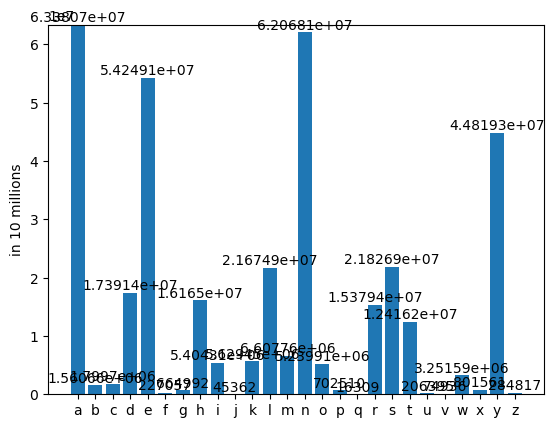

In [126]:
# Example data
letters = df_letter['letter']
numbers = df_letter['number']


# Example data
fruit_names = ['Coffee', 'Salted Caramel', 'Pistachio']
fruit_counts = [4000, 2000, 7000]

fig, ax = plt.subplots()
bar_container = ax.bar(letters, numbers)
ax.set(ylabel='in 10 millions', ylim=(0, 63380722))
ax.bar_label(bar_container)

plt.show()

### Task 4

Now, create a timeline for one last letter.

First, select that letter over all years. Second, group by the year and calculate the count for each year. The resulting table should look like this:

    year  count
    1880    300
    1881    317
    1882    342
    ...
    
Finally, create a line plot from this data.


In [151]:
df_letter_oy = df.groupby(['letter', 'year'])['number'].sum()
df_letter_t = df_letter_oy['t'].reset_index()

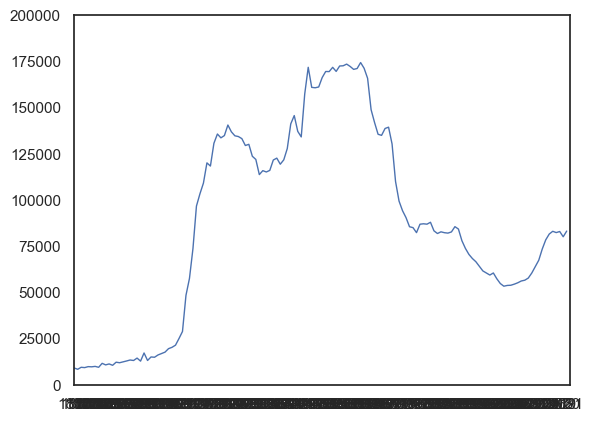

In [257]:
# plot
fig, ax = plt.subplots()

ax.plot(df_letter_t['year'],df_letter_t['number'], linewidth=1.0)

ax.set(xlim=(0, 142),
       ylim=(0, 200000))
plt.savefig('timeline.png', dpi=150)
plt.show()

### Task 5

Let's plot multiple timelines.

Count the names grouped by last letter and year. Use the expression:

df.groupby([col1, col2])[col3].count()
The resulting table should look something like this:

    last  year
    a     1880    31446
          1881    31581
          1882    36536
    ...
    b     1880     5432
    
This DataFrame has a hierarchical index.

Convert the DataFrame to a crosstable that has the year in the row index and the letters in the column index. You can do this with the expression

    df.unstack(0)
    
Draw a line plot showing the frequency of the letters d, n and y. Try other ones if you like.

In [155]:
df_letters = df_letter_oy.unstack(0)
df_letters

letter,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
year,,,,,,,,,,,,,,,,,,,,,
1880,32222.0,509.0,349.0,9786.0,46874.0,108.0,154.0,8912.0,261.0,NaN,...,NaN,7935.0,19844.0,9100.0,405.0,33.0,853.0,304.0,18838.0,135.0
1881,32348.0,470.0,331.0,8993.0,46485.0,83.0,151.0,8548.0,284.0,NaN,...,NaN,7690.0,17685.0,8393.0,453.0,18.0,753.0,267.0,18207.0,103.0
1882,37309.0,506.0,354.0,10435.0,55012.0,135.0,158.0,9742.0,288.0,NaN,...,NaN,8578.0,19876.0,9481.0,420.0,43.0,875.0,355.0,20958.0,137.0
1883,39086.0,452.0,304.0,9604.0,55104.0,106.0,143.0,9625.0,243.0,NaN,...,NaN,8149.0,18336.0,9308.0,460.0,44.0,794.0,290.0,20344.0,153.0
1884,44497.0,496.0,319.0,10772.0,62725.0,131.0,184.0,10843.0,242.0,NaN,...,NaN,9701.0,19748.0,9831.0,505.0,36.0,826.0,343.0,23120.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,684041.0,25152.0,21775.0,45634.0,433757.0,3014.0,6048.0,222480.0,112911.0,1691.0,...,473.0,225380.0,153028.0,83066.0,5381.0,3641.0,27672.0,23762.0,288713.0,4386.0
2018,681603.0,23301.0,20603.0,45390.0,422734.0,2994.0,5828.0,216825.0,118978.0,1598.0,...,493.0,223268.0,152483.0,82371.0,5633.0,3572.0,25785.0,24049.0,279752.0,4458.0
2019,673261.0,21261.0,19552.0,44546.0,415725.0,2993.0,5768.0,214382.0,126424.0,1632.0,...,417.0,223414.0,156770.0,82949.0,6232.0,3429.0,25734.0,23795.0,271793.0,4549.0


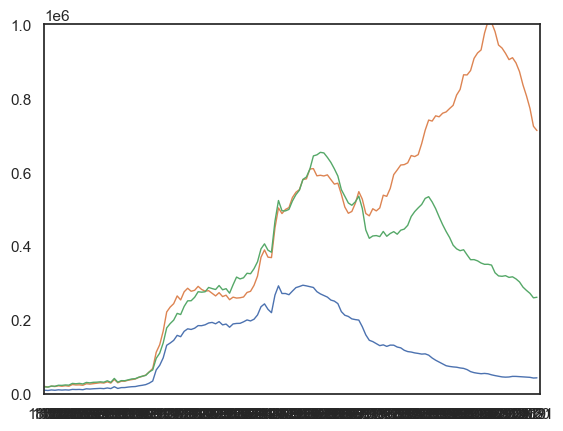

In [268]:
# plot
fig, ax = plt.subplots()

ax.plot(df_letters['d'], linewidth=1.0)
ax.plot(df_letters['n'], linewidth=1.0)
ax.plot(df_letters['y'], linewidth=1.0)

ax.set(xlim=(0, 142),
       ylim=(0, 1000000))

plt.savefig('multipletimelines.png', dpi=150)

plt.show()


<Figure size 640x480 with 0 Axes>

### Task 6

Finally, let's look for frequent first/last letter combinations.

Add an extra column containing the first letter.
Cross-tabulate by grouping by first and last letter and count the names (over all years).
Now you should have a table with first letters in columns an last letters in rows (or vice versa).

Plot a heatmap (check the Seaborn Example Gallery).

Hints:
To make the plot nicer convert the names to upper or lower case at the very beginning with:

df['name'].str.uppper()
You also might sort the table by rows:

df.sort_values(by=col, axis=0`)
For sorting by columns, set axis=0

In [185]:
def firstLetter(string):
    return string[0]

df['FirstLetter'] = df['name'].apply(firstLetter)

df

,name,gender,number,year,LastLetter,FirstLetter
0,EMILY,F,25957,2000,Y,E
1,HANNAH,F,23085,2000,H,H
2,MADISON,F,19968,2000,N,M
3,ASHLEY,F,17997,2000,Y,A
4,SARAH,F,17708,2000,H,S
...,...,...,...,...,...,...
2052776,ZYHEEM,M,5,2019,M,Z
2052777,ZYKEL,M,5,2019,L,Z
2052778,ZYKING,M,5,2019,G,Z
2052779,ZYN,M,5,2019,N,Z


In [190]:
df_cross = df.groupby(['FirstLetter', 'LastLetter'])['year'].count()


In [213]:
df_cross = df_cross.unstack(0)
df_cross

FirstLetter,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
LastLetter,,,,,,,,,,,,,,,,,,,,,
A,66332.0,13044.0,29486.0,32302.0,23524.0,8495.0,10762.0,6138.0,10835.0,25602.0,...,1626.0,23573.0,43570.0,37680.0,1259.0,14418.0,4076.0,979.0,5590.0,9675.0
B,398.0,239.0,430.0,43.0,151.0,NaN,63.0,227.0,4.0,1043.0,...,NaN,271.0,340.0,126.0,NaN,NaN,136.0,NaN,124.0,448.0
C,744.0,157.0,378.0,1092.0,514.0,291.0,20.0,21.0,760.0,381.0,...,27.0,292.0,114.0,189.0,63.0,104.0,10.0,23.0,8.0,111.0
D,3247.0,3022.0,2138.0,3117.0,2503.0,1526.0,2563.0,2686.0,428.0,3230.0,...,37.0,6536.0,3443.0,1606.0,47.0,269.0,2449.0,NaN,202.0,494.0
E,31096.0,16117.0,31701.0,26567.0,18068.0,5676.0,12163.0,6625.0,3671.0,35234.0,...,633.0,17300.0,22708.0,15125.0,363.0,7259.0,3854.0,213.0,1941.0,2946.0
F,526.0,45.0,206.0,43.0,52.0,NaN,199.0,100.0,15.0,421.0,...,NaN,442.0,406.0,53.0,1.0,1.0,100.0,NaN,522.0,29.0
G,221.0,187.0,803.0,371.0,268.0,192.0,509.0,494.0,228.0,136.0,...,43.0,56.0,981.0,504.0,3.0,102.0,151.0,53.0,461.0,60.0
H,11989.0,2537.0,1966.0,3898.0,4459.0,976.0,1041.0,2580.0,1781.0,7996.0,...,125.0,3731.0,7427.0,3835.0,410.0,383.0,506.0,101.0,620.0,3180.0
I,8853.0,2400.0,3858.0,4753.0,2177.0,485.0,1911.0,2275.0,1111.0,7864.0,...,136.0,3822.0,6992.0,5079.0,209.0,1252.0,348.0,232.0,2142.0,1435.0


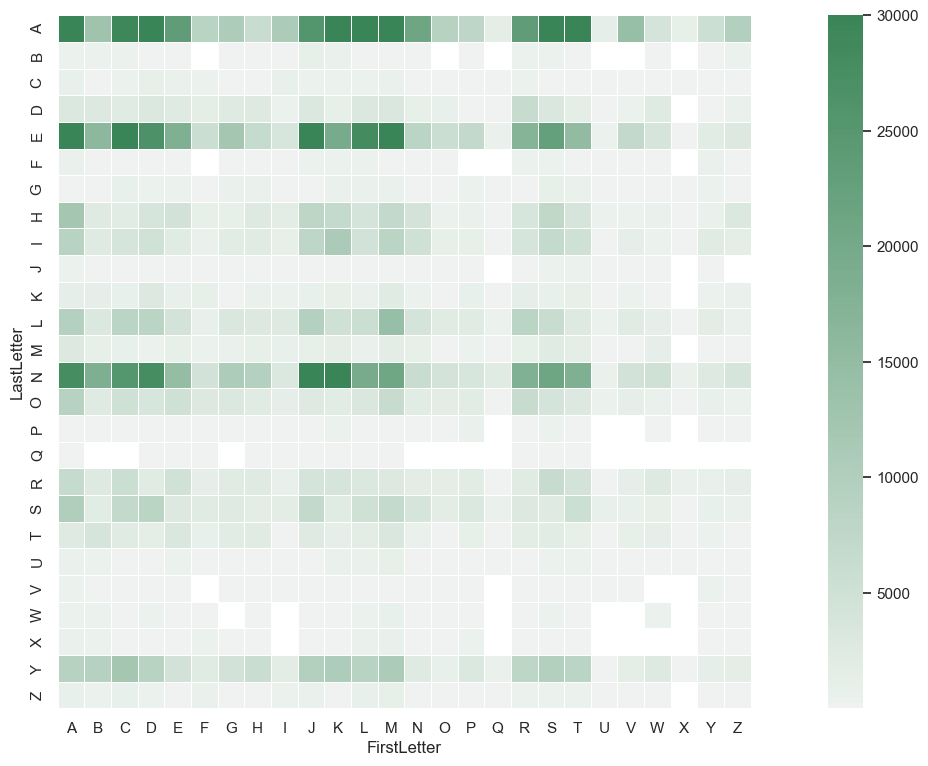

In [260]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(3000, 500, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_cross, cmap=cmap, vmax=30000, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})
plt.savefig('heatmap.png', dpi=150)


### Task 8

What visualization(s) would you use to compare the last letters of girls and boys?


I would go for a Horizontal Bar Chart where I create seperated colored groups for boys and girls. This allows to compare invidual letters and the overall Trend difference.